In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [286]:
# load dataset
df = pd.read_csv('stud.csv')

In [287]:
df.head().style.background_gradient(cmap='plasma')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [288]:
# check number of rows and columns
df.shape

(1000, 8)

- There are 1000 rows and 8 columns in the dataset

In [289]:
## take 5 random rows of the data for better understanding
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
746,male,group D,high school,standard,none,69,75,71
987,male,group E,some high school,standard,completed,81,75,76
541,male,group D,associate's degree,free/reduced,completed,79,82,80
238,male,group B,some college,standard,none,54,52,51
284,female,group B,some high school,standard,none,37,46,46


In [290]:
# check data types of the columns in the dataset
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

- From the above check, there are 5 categorical columns and 3 numerical columns

In [291]:
# check descriptive statistic
df.describe().style.background_gradient(cmap='coolwarm')

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.089000,69.169000,68.054000
std,15.163080,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


- The above table gives the statistical summary of the numerical columns:
- mean score, standard deviation and so on

In [292]:
# check missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- There are no missing values in the dataset

In [293]:
# check duplicates
duplicate = df.duplicated()
print(duplicate.sum())

0


- There are no duplicates in the data

In [294]:
# separate categorical columns and numerical columns
num_col  = df.select_dtypes(exclude='object')
cat_col = df.select_dtypes(include='object')

In [295]:
# numerical columns in the data
num_col

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [296]:
# categorical columns in the data
cat_col

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


### EDA

### Visualizing the categorical columns using countplot

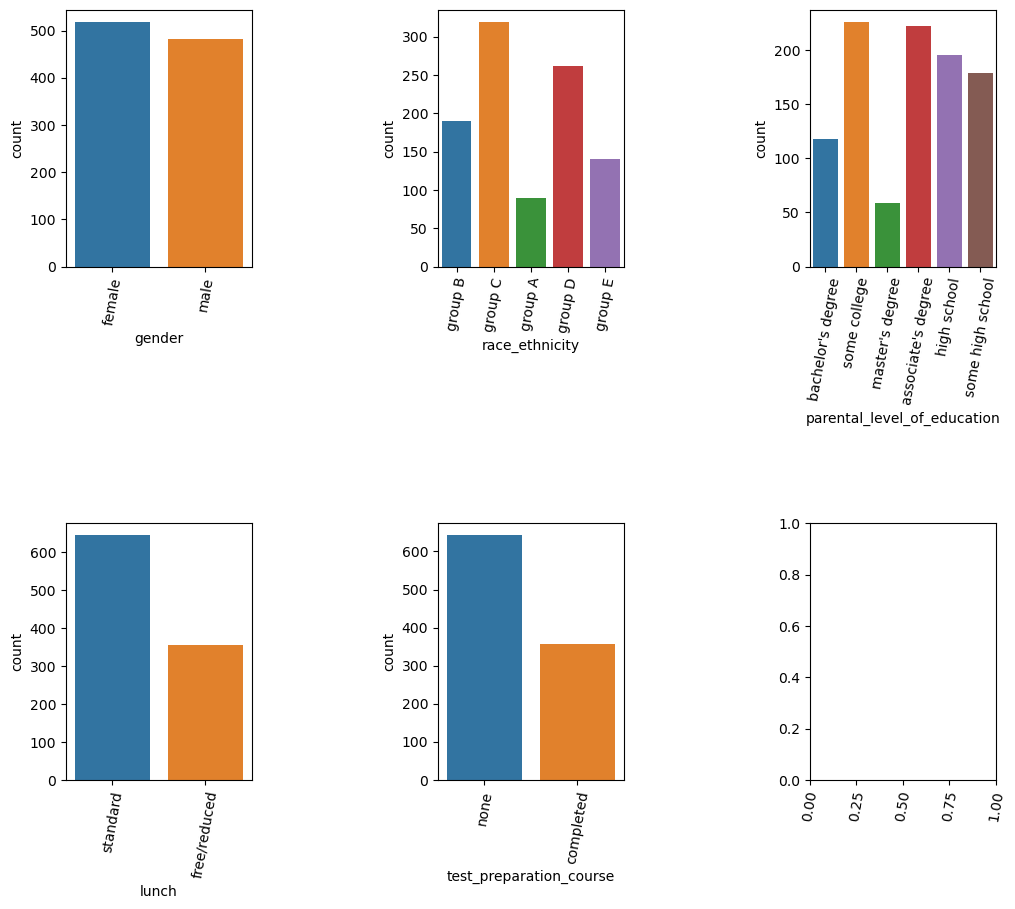

In [297]:
# countplot of various categorical columns
fig,ax = plt.subplots(2,3, figsize=(12,10))

for idx,c_col in enumerate(cat_col):
    row,col = idx//3, idx%3
    sns.countplot(x=c_col, data=df, ax=ax[row,col])
    
plt.subplots_adjust(hspace=1,wspace=1)
for ax in fig.get_axes():
    ax.tick_params(axis='x', labelrotation=80)
plt.show()

- From the above countplots,
- Female students are more than male students
- Students who take standard lunch are more than those who take free/reduced lunch
- Students who took test_preparation course are less than those who did not take test preparation course
- Group C and group D has more students than the other race ethnic groups
- Students whose parent completed bachelors degree and masters degree are fewer 

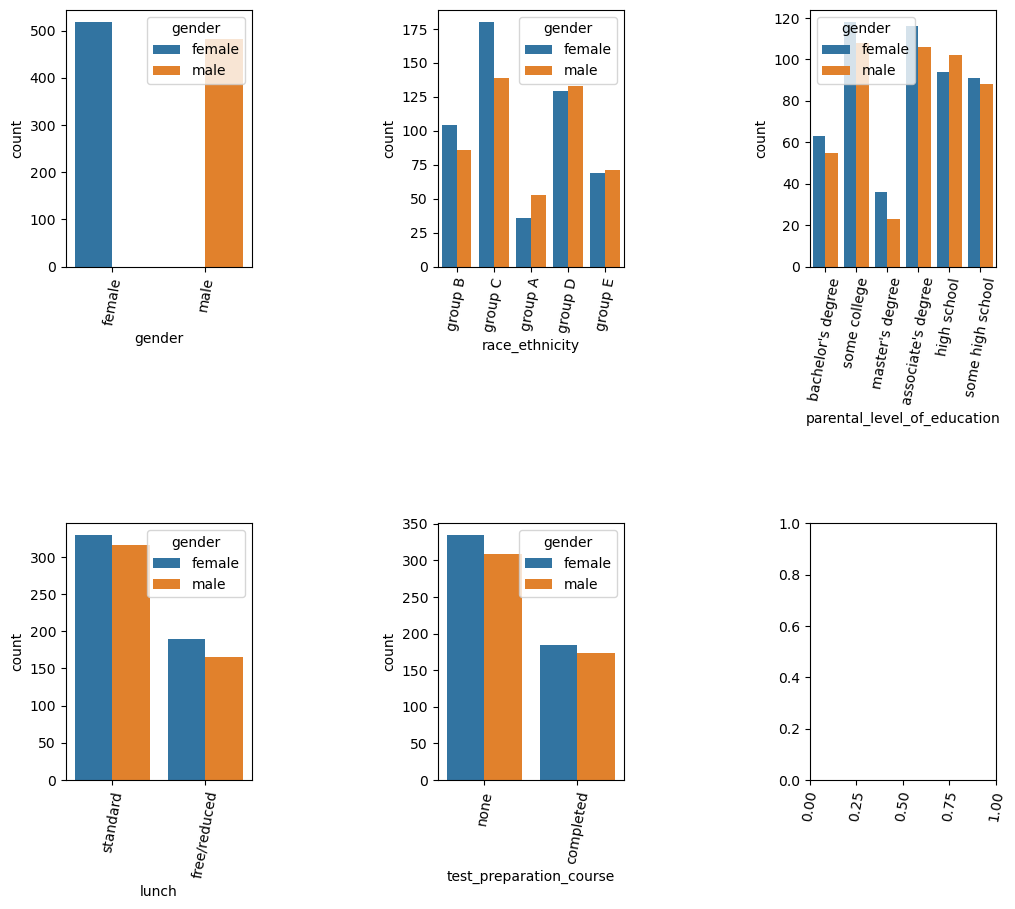

In [298]:
# countplot data in categorical columns by gender
fig,ax = plt.subplots(2,3, figsize=(12,10))

for idx,c_col in enumerate(cat_col):
    row,col = idx//3, idx%3
    sns.countplot(x=c_col, data=df,hue='gender', ax=ax[row,col])
    
plt.subplots_adjust(hspace=1,wspace=1)
for ax in fig.get_axes():
    ax.tick_params(axis='x', labelrotation=80)
plt.show()

- The above plots give clear count of gender in each categorical column

### Distribution of Numerical values by the categorical variables

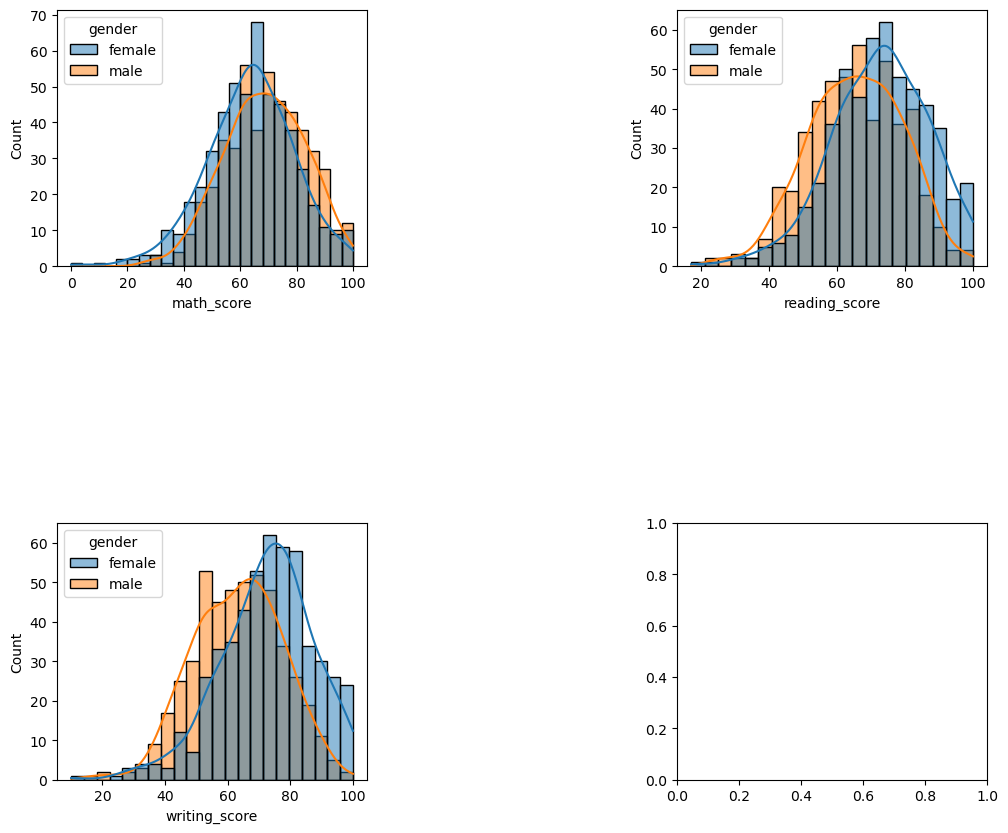

In [299]:
# Distribution of score by gender
fig,ax = plt.subplots(2,2, figsize=(12,10))

for idx,c_col in enumerate(num_col):
    row,col = idx//2, idx%2
    sns.histplot(x=c_col,hue='gender' ,data=df,ax=ax[row,col],kde=True)
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

- The females outperformed the males in reading and writing exams from the above distributions
- The males performed well in maths exam
- But on average, females performed well in all the exams
- The distribution of all the score is skewed to the left

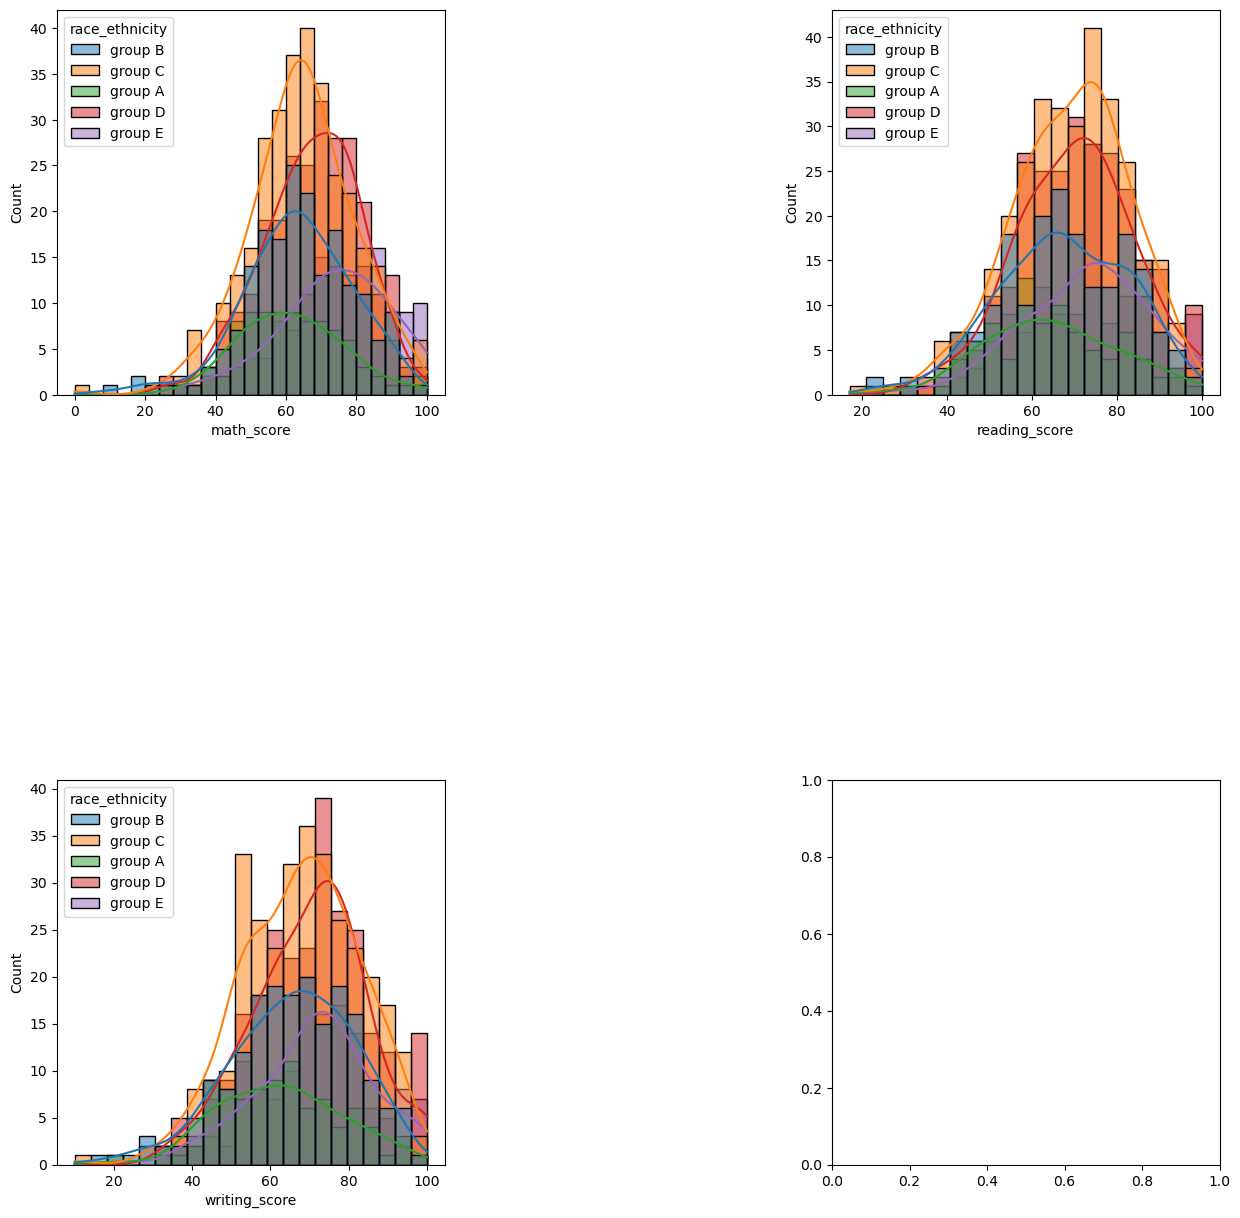

In [300]:
# Distribution of score by race_ethnicity
fig,ax = plt.subplots(2,2, figsize=(15,15))

for idx,c_col in enumerate(num_col):
    row,col = idx//2, idx%2
    sns.histplot(x=c_col,hue='race_ethnicity' ,data=df,ax=ax[row,col],kde=True)
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

- from the above distribution:
- Group A B and C performed averagely in all the exams
- Group D and E performed well in all the exams

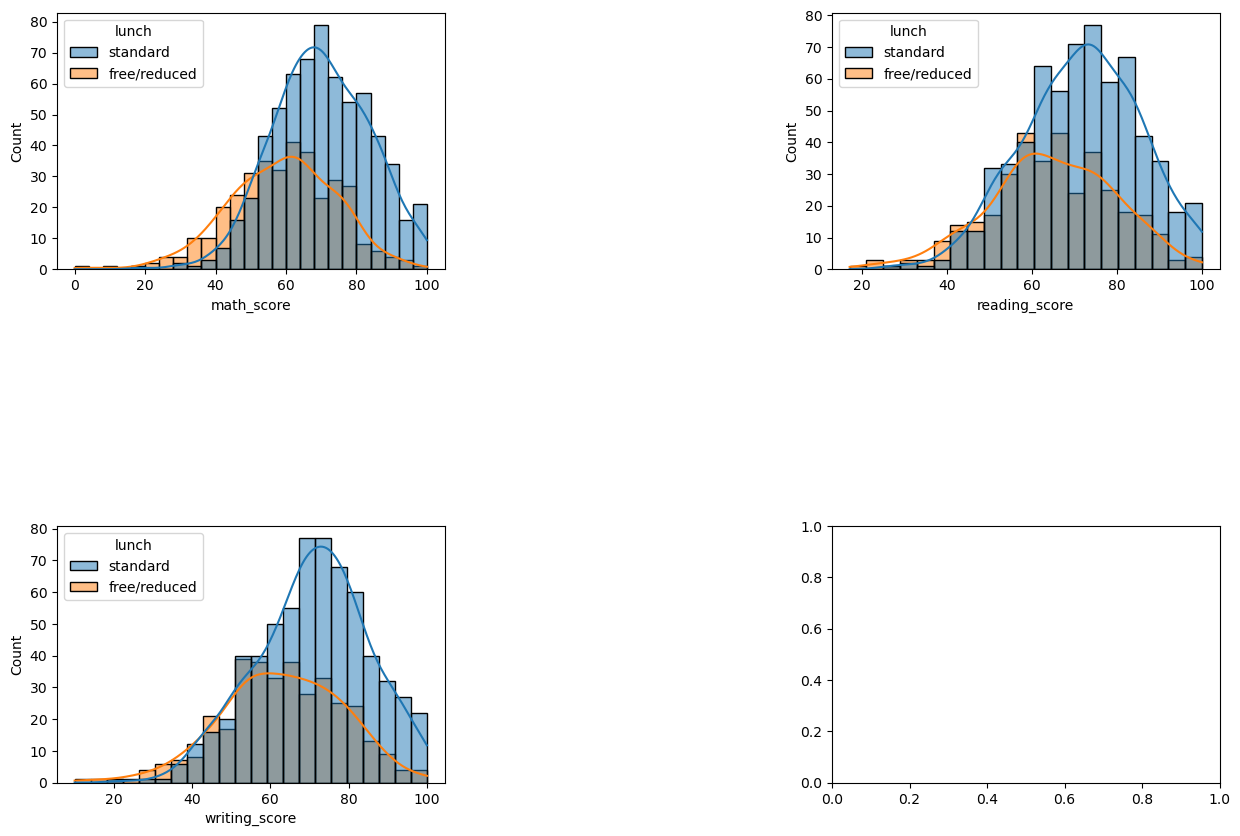

In [301]:
# Distribution of score by lunch
fig,ax = plt.subplots(2,2, figsize=(15,10))

for idx,c_col in enumerate(num_col):
    row,col = idx//2, idx%2
    sns.histplot(x=c_col,hue='lunch' ,data=df,ax=ax[row,col], kde=True)
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

- Students who had standard lunch outperformed those who had free/reduced lunch in all the exams

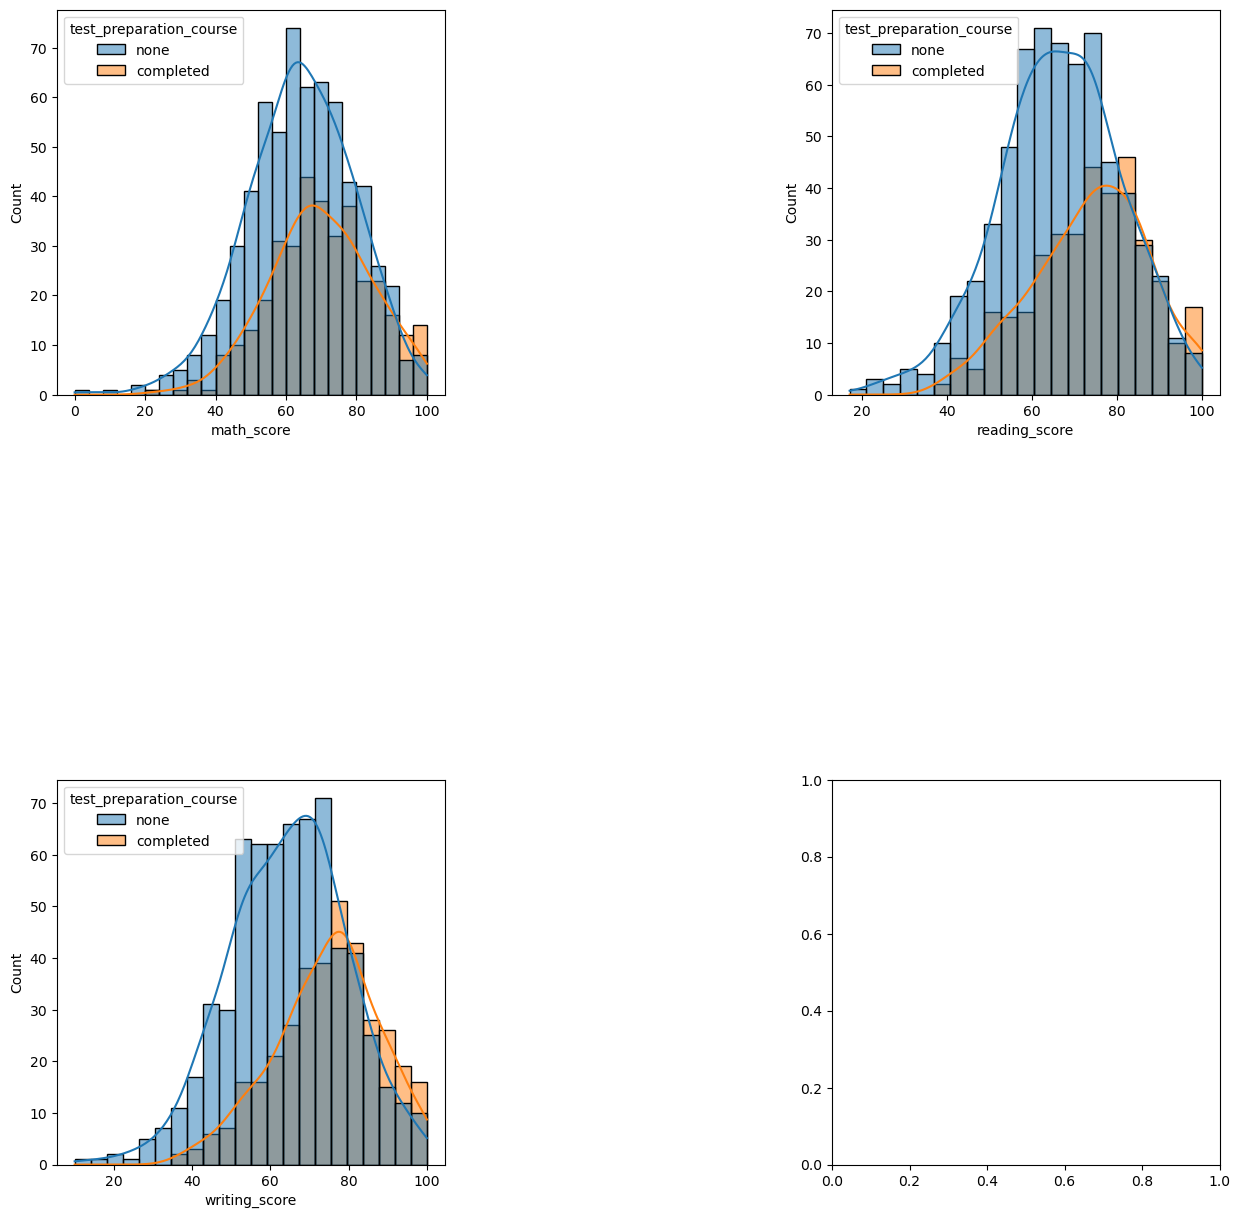

In [302]:
# Distribution of score by test_preparation_course
fig,ax = plt.subplots(2,2, figsize=(15,15))

for idx,c_col in enumerate(num_col):
    row,col = idx//2, idx%2
    sns.histplot(x=c_col,hue='test_preparation_course' ,data=df,ax=ax[row,col],kde=True)
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

- Students who completed the test preparation course outperformed the those who did not complete the preparation course

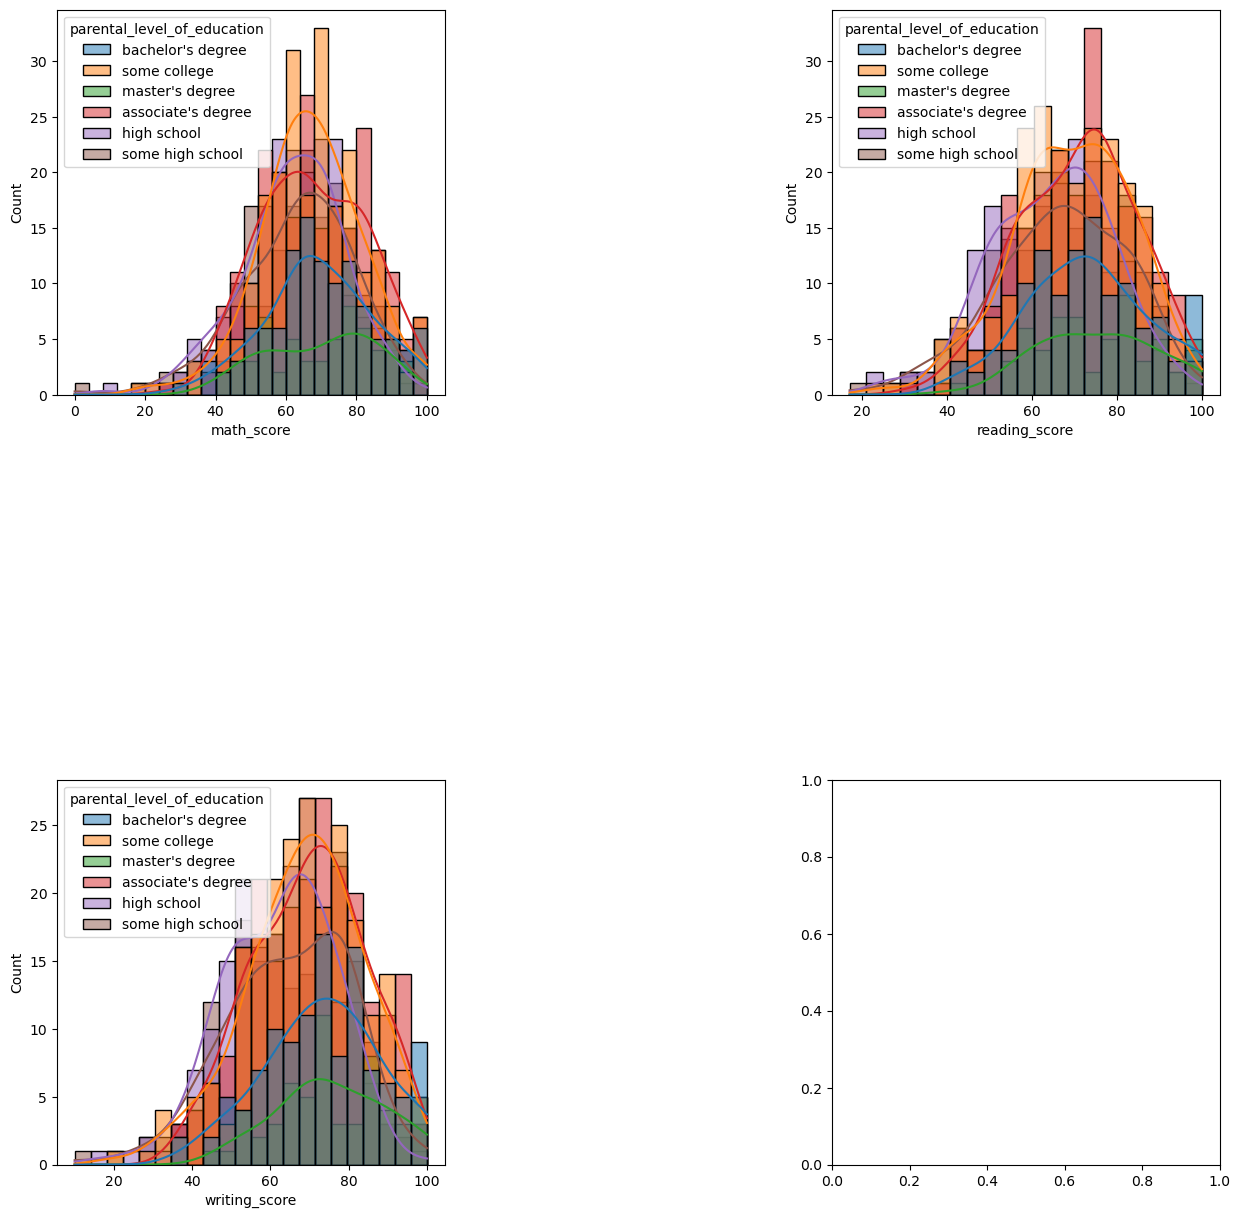

In [303]:
# Distribution of score by parental_level_of_education
fig,ax = plt.subplots(2,2, figsize=(15,15))

for idx,c_col in enumerate(num_col):
    row,col = idx//2, idx%2
    sns.histplot(x=c_col,hue='parental_level_of_education' ,data=df,ax=ax[row,col],kde=True)
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

- Parental education level is having little on students performance

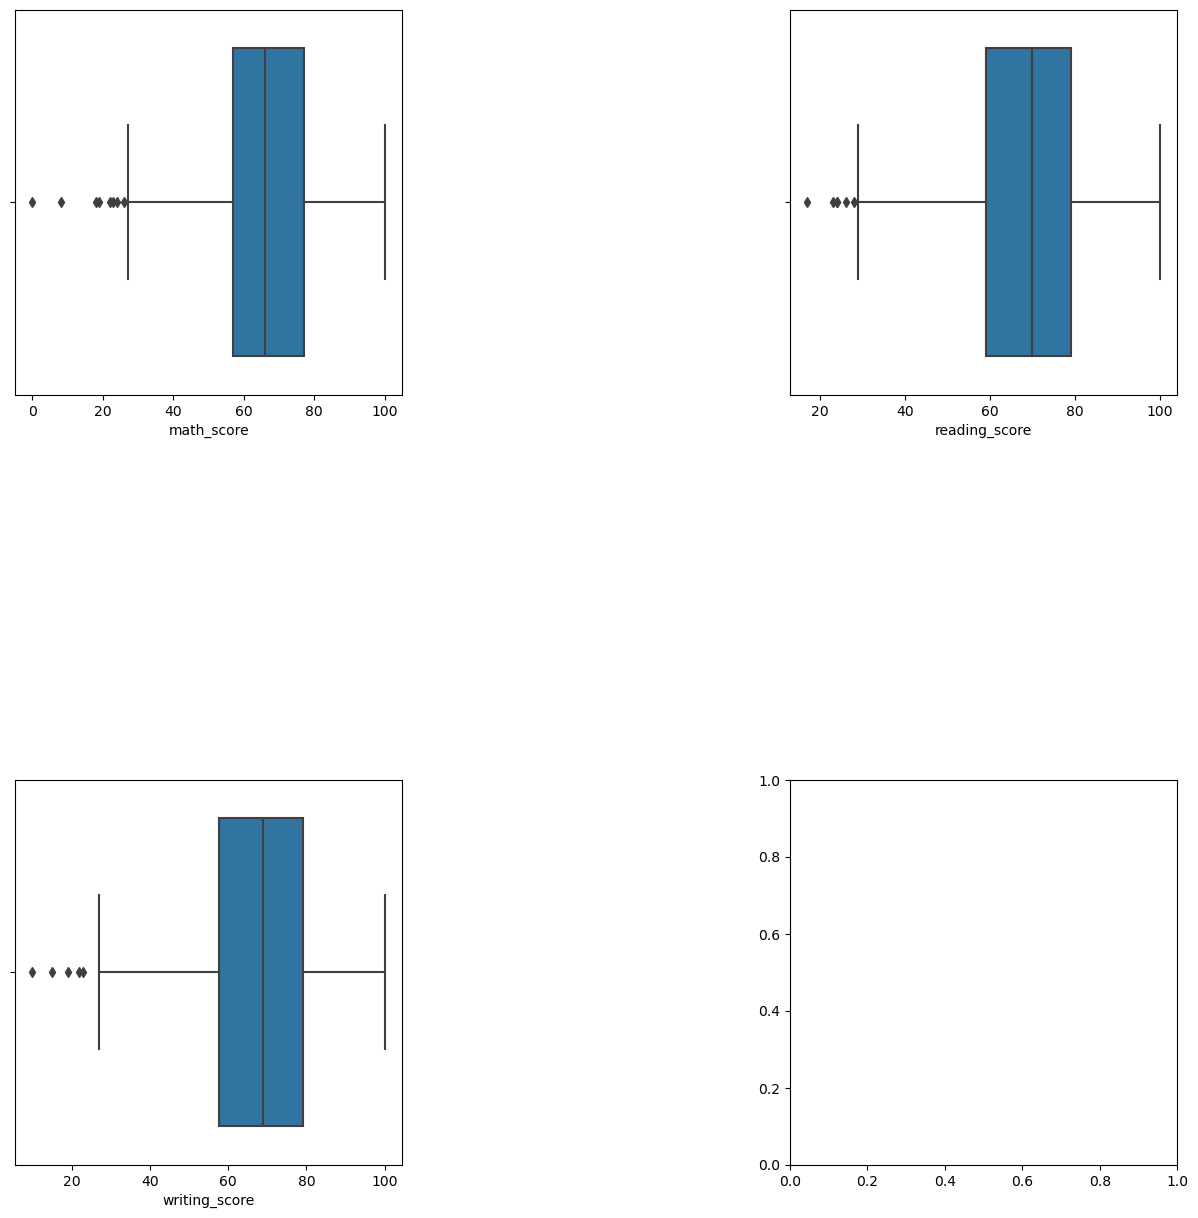

In [304]:
# check outliers using boxplot
fig,ax = plt.subplots(2,2, figsize=(15,15))

for idx,c_col in enumerate(num_col):
    row,col = idx//2, idx%2
    sns.boxplot(x=c_col ,data=df,ax=ax[row,col])
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

- There are a few outliers in the scores

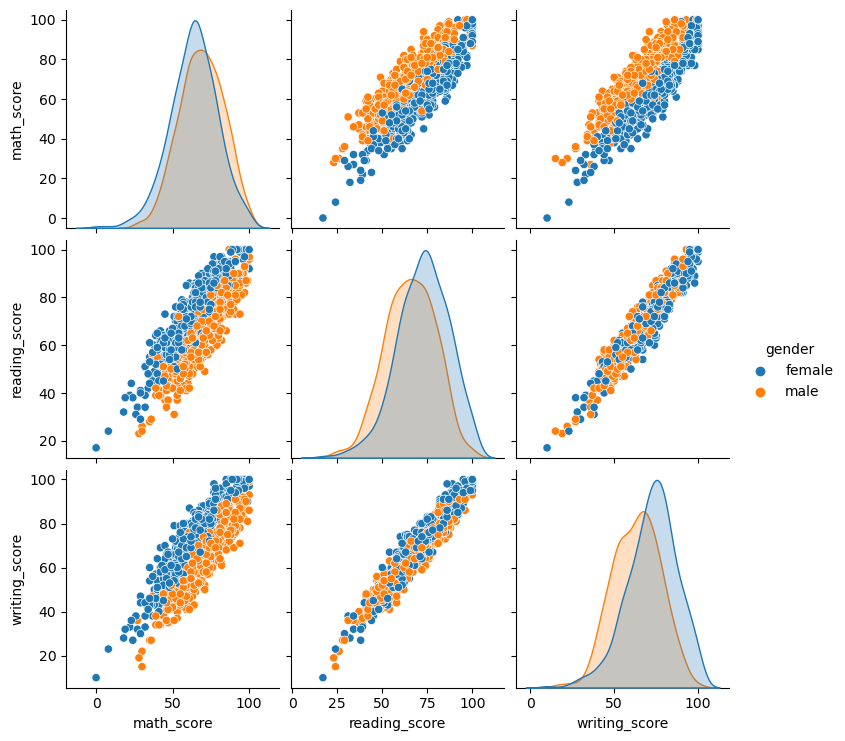

In [305]:
sns.pairplot(df,x_vars=num_col,hue='gender')

- From the above scatterplot, there is some kind of linear relationship between the scores

<function matplotlib.pyplot.show(close=None, block=None)>

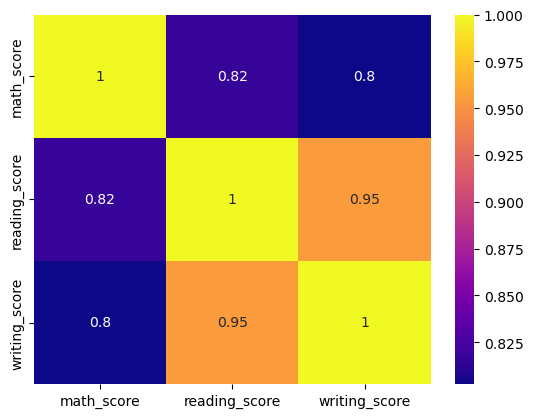

In [306]:
corr = num_col.corr()
sns.heatmap(corr, annot=True,cmap='plasma')
plt.show

- All the scores are highly correlated

## Data Preprocessing

### Feature Engineering

In [307]:
### write a function to remove outliers
def remove_outlier(data):
    for col in data.columns:
        if data[col].dtypes !='object':
            
            q1,q3 = data[col].quantile([0.25,0.75])
            iqr = q3 - q1
            lower = q1 - (1.5*iqr)
            upper =q3 + (1.5*iqr)
            data[col] =np.where(data[col]>upper,upper,data[col])
            data[col] =np.where(data[col]<lower,lower,data[col])
    return data
    

In [308]:
df = remove_outlier(df)

In [309]:
## add one additional column which the average of the scores and it will be our target columns
df['average_score'] = round((df['reading_score']+df['writing_score']+df['math_score'])/3 ,2)
df['total_score'] =(df['reading_score']+df['writing_score']+df['math_score'])

In [310]:
# convert categorical values to numerical values
def convert_cat_to_num(data):
    for col in data.columns:
        if data[col].dtypes =='object':
            data[col] = data[col].astype('category').cat.codes
    return data

In [311]:
df = convert_cat_to_num(df)

In [312]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,total_score
0,0,1,1,1,1,72.0,72.0,74.0,72.67,218.0
1,0,2,4,1,0,69.0,90.0,88.0,82.33,247.0
2,0,1,3,1,1,90.0,95.0,93.0,92.67,278.0
3,1,0,0,0,1,47.0,57.0,44.0,49.33,148.0
4,1,2,4,1,1,76.0,78.0,75.0,76.33,229.0


In [313]:
# drop math_score, reading_score and writing score
df.drop(['math_score','reading_score','writing_score'],axis=1, inplace=True)

In [314]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,average_score,total_score
0,0,1,1,1,1,72.67,218.0
1,0,2,4,1,0,82.33,247.0
2,0,1,3,1,1,92.67,278.0
3,1,0,0,0,1,49.33,148.0
4,1,2,4,1,1,76.33,229.0


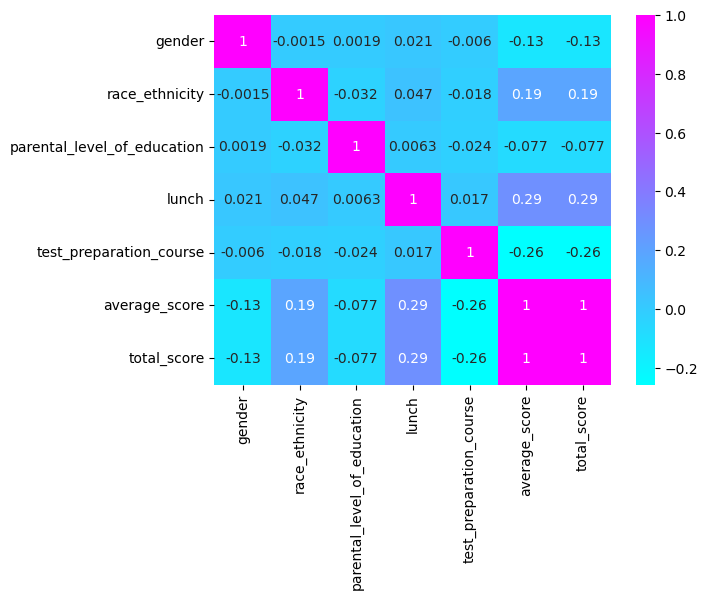

In [315]:
## check correlation
corr_df =df.corr()
sns.heatmap(corr_df,annot=True,cmap='cool')
plt.show()

- This correlation heatmap was done to give the relationship between the features and the target column.
- Only race_ethnicity and lunch are correlating positively with the target column


## Prepare the data for modelling

In [316]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [317]:
# Divide the data into feature and target set
X = df.drop(['average_score','total_score'],axis=1)
Y = df['average_score']

In [318]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1


In [319]:

Y.head()

0    72.67
1    82.33
2    92.67
3    49.33
4    76.33
Name: average_score, dtype: float64

In [320]:
## Train test split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [321]:
# shape of train
print(x_train.shape)
print(y_train.shape)

(750, 5)
(750,)


In [322]:
# shape of test
print(x_test.shape)
print(y_test.shape)

(250, 5)
(250,)


In [323]:
## Standardize the data
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Build Models

In [324]:
# write model building function

def build_model(model):
    model =model.fit(x_train,y_train)
    model_pred = model.predict(x_test)
    train_score = print('Train score:',model.score(x_train,y_train))
    test_score = print("Test score:", model.score(x_test,y_test))
    mae = print("MAE:", mean_absolute_error(y_test,model_pred))
    mse = print("MSE: ", mean_squared_error(y_test,model_pred))
    rmse =print("RMSE: ",np.sqrt(mean_squared_error(y_test,model_pred)))
    r2 = print("R2_score: ",r2_score(y_test,model_pred))
    
    return

#### LinearRegression

In [325]:
build_model(LinearRegression())

Train score: 0.2177761958923372
Test score: 0.15729407163977915
MAE: 10.63407300510909
MSE:  178.77257096366964
RMSE:  13.37058603665784
R2_score:  0.15729407163977915


#### RandomForestRegressor

In [326]:
build_model(RandomForestRegressor())

Train score: 0.4121382421761306
Test score: -0.041854715353033534
MAE: 11.875718567009837
MSE:  221.02021567204156
RMSE:  14.866748658400113
R2_score:  -0.041854715353033534


#### DecisionTreeRegressor

In [327]:
build_model(DecisionTreeRegressor())

Train score: 0.42029528121352655
Test score: -0.11605450999807787
MAE: 12.323948984570983
MSE:  236.7610424625714
RMSE:  15.387041381063852
R2_score:  -0.11605450999807787


#### AdaBoostRegressor

In [328]:
build_model(AdaBoostRegressor())

Train score: 0.23270771923143962
Test score: 0.13673038176635222
MAE: 10.757418944632708
MSE:  183.13497495710715
RMSE:  13.532737156876548
R2_score:  0.13673038176635222


#### SVR

In [329]:
build_model(SVR())

Train score: 0.21194740963261405
Test score: 0.13697892490634855
MAE: 10.73347775889371
MSE:  183.08224873952972
RMSE:  13.530788917854336
R2_score:  0.13697892490634855
